In [1]:
import nltk
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


#importing the webtext corpus from the nltk library
from nltk.corpus import webtext
nltk.download('webtext')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


True

In [2]:
#getting the file identifiers in the corpus
nltk.corpus.webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']


NLTK Text: A wrapper around a sequence of simple (string) tokens, which is intended to support initial exploration of texts (via the interactive console). Its methods perform a variety of analyses on the text's contexts (e.g., counting, concordancing, collocation discovery), and display the results.

In [3]:
#fetching the tokens from the wine.txt file in the corpus
words = nltk.Text(webtext.words('wine.txt'))
words = [word.lower() for word in words]
print('total no. of words:',len(words))
print(words[0:9])

total no. of words: 31350
['lovely', 'delicate', ',', 'fragrant', 'rhone', 'wine', '.', 'polished', 'leather']


In [4]:
vocab = nltk.FreqDist(words)
print(len(vocab))

2885


In [5]:
freq_list = list(vocab.values())
freq_list.sort(reverse=True)
print(freq_list)

[2772, 1536, 1051, 832, 789, 744, 498, 491, 482, 392, 380, 363, 356, 311, 303, 300, 289, 260, 239, 234, 224, 221, 217, 216, 181, 177, 163, 162, 160, 159, 155, 154, 153, 151, 148, 145, 141, 136, 133, 122, 121, 112, 107, 102, 101, 99, 96, 93, 92, 88, 88, 87, 84, 83, 78, 77, 77, 76, 76, 74, 74, 73, 73, 71, 70, 69, 68, 67, 66, 66, 66, 65, 65, 64, 63, 63, 62, 62, 62, 62, 59, 58, 58, 58, 57, 57, 56, 56, 56, 55, 54, 53, 53, 52, 52, 51, 50, 50, 50, 50, 50, 48, 46, 46, 46, 45, 45, 44, 44, 43, 43, 42, 42, 42, 42, 42, 41, 41, 40, 40, 40, 39, 38, 38, 38, 38, 37, 37, 37, 37, 37, 36, 36, 35, 35, 35, 35, 34, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 31, 30, 30, 30, 29, 29, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 26, 26, 26, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,

Verifying Zipf's Law i.e.
frequency = 1/(rank)

In [6]:
df = pd.DataFrame(columns=["Rank","Frequency","Freq*rank"])

for rank,freq in enumerate(freq_list):
  df.loc[rank] = [math.log(rank+1),math.log(freq),freq*(rank+1)]

print(df)

          Rank  Frequency  Freq*rank
0     0.000000   7.927324     2772.0
1     0.693147   7.336937     3072.0
2     1.098612   6.957497     3153.0
3     1.386294   6.723832     3328.0
4     1.609438   6.670766     3945.0
...        ...        ...        ...
2880  7.965893   0.000000     2881.0
2881  7.966240   0.000000     2882.0
2882  7.966587   0.000000     2883.0
2883  7.966933   0.000000     2884.0
2884  7.967280   0.000000     2885.0

[2885 rows x 3 columns]


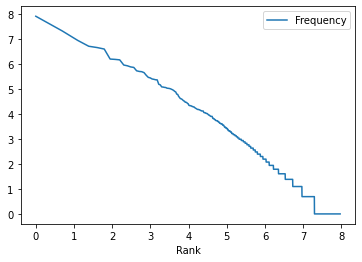

In [7]:
df.plot(x='Rank', y='Frequency')

In [8]:
X = np.array(df["Rank"]).reshape(-1,1)
y = np.array(df["Frequency"]).reshape(-1,1)
print(X)
print(y)


[[0.        ]
 [0.69314718]
 [1.09861229]
 ...
 [7.9665867 ]
 [7.9669335 ]
 [7.96728018]]
[[7.92732436]
 [7.33693691]
 [6.95749737]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


In [9]:
reg = LinearRegression().fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[[-1.20881172]]
[9.32212011]


In [10]:
prediction = reg.predict(X)
print(prediction)

[[ 9.32212011]
 [ 8.48423567]
 [ 7.9941047 ]
 ...
 [-0.30798325]
 [-0.30840247]
 [-0.30882154]]


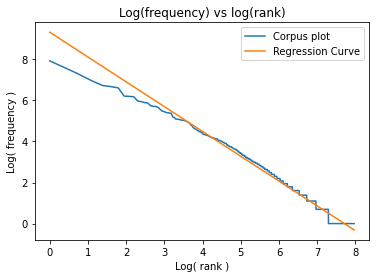

In [11]:
plt.figure()
plt.plot(X,y,label='frequency')
plt.plot(X,prediction,label='best fit')
plt.xlabel('Log( rank )')
plt.ylabel('Log( frequency )')
plt.title("Log(frequency) vs log(rank)")
legend = []
legend.append("Corpus plot")
legend.append("Regression Curve")
plt.legend(legend, loc='upper right')
plt.show()

Verifying Mandelbrot law i.e.
frequency = 1/(rank+2.7)

          Rank  Frequency  Freq*rank
0     1.308333   7.927324     2772.0
1     1.547563   7.336937     3072.0
2     1.740466   6.957497     3153.0
3     1.902108   6.723832     3328.0
4     2.041220   6.670766     3945.0
...        ...        ...        ...
2880  7.966829   0.000000     2881.0
2881  7.967176   0.000000     2882.0
2882  7.967523   0.000000     2883.0
2883  7.967869   0.000000     2884.0
2884  7.968216   0.000000     2885.0

[2885 rows x 3 columns]
[[1.30833282]
 [1.54756251]
 [1.74046617]
 ...
 [7.96752278]
 [7.96786926]
 [7.96821562]]
[[7.92732436]
 [7.33693691]
 [6.95749737]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
[[-1.23413993]]
[9.50722395]
[[ 7.89255818]
 [ 7.59731527]
 [ 7.35924515]
 ...
 [-0.32581406]
 [-0.32624166]
 [-0.32666911]]


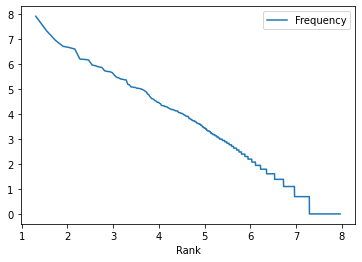

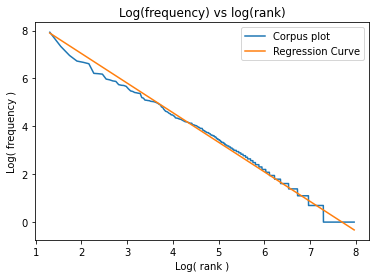

In [12]:
df = pd.DataFrame(columns=["Rank","Frequency","Freq*rank"])

for rank,freq in enumerate(freq_list):
  df.loc[rank] = [math.log(rank+3.7),math.log(freq),freq*(rank+1)]

print(df)
df.plot(x='Rank', y='Frequency')

X = np.array(df["Rank"]).reshape(-1,1)
y = np.array(df["Frequency"]).reshape(-1,1)
print(X)
print(y)

reg = LinearRegression().fit(X,y)
print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(X)
print(prediction)

plt.figure()
plt.plot(X,y,label='frequency')
plt.plot(X,prediction,label='best fit')
plt.xlabel('Log( rank )')
plt.ylabel('Log( frequency )')
plt.title("Log(frequency) vs log(rank)")
legend = []
legend.append("Corpus plot")
legend.append("Regression Curve")
plt.legend(legend, loc='upper right')
plt.show()

Verfying Heaps Law:
M = kT^b
where b = 0.49 and 30<= k <=100

In [23]:
T = len(words)
M = len(vocab)
print(T)

31350


In [24]:
lower_cal_M = 30*math.pow(T,0.43)
upper_cal_M = 100*math.pow(T,0.43)

print(lower_cal_M)
print(upper_cal_M)
print(M)

2573.3769056851042
8577.923018950349
2885
